Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

***Import Data***

In [3]:
glob.glob(r"D:\python_analysis_project\Time_Series_Project_Stock_Market_Case\Dataset/*csv")

['D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\AAL_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\AAPL_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\AAP_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ABBV_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ABC_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ABT_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ACN_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ADBE_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ADI_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\ADM_data.csv',
 'D:\\python_analysis_project\\Time_Series_Project_Stock_

In [4]:
len(glob.glob(r'D:\python_analysis_project\Time_Series_Project_Stock_Market_Case\Dataset/*csv'))

509

In [5]:
company_list = [
    r'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\AAPL_data.csv',
    r'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\AMZN_data.csv',
    r'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\GOOG_data.csv',
    r'D:\\python_analysis_project\\Time_Series_Project_Stock_Market_Case\\Dataset\\MSFT_data.csv'
]

In [6]:
all_data = pd.DataFrame()
for i in company_list:
    current_df = pd.read_csv(i)
    all_data = pd.concat([all_data, current_df], ignore_index= True)
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
all_data.shape

(4752, 7)

In [8]:
all_data.describe()

,open,high,low,close,volume
count,4752.000000,4752.000000,4752.000000,4752.000000,4.752000e+03
mean,344.075960,346.906095,340.992481,344.100091,2.465232e+07
std,329.660871,332.181676,326.876297,329.705792,2.956724e+07
min,27.350000,27.600000,27.230000,27.370000,7.932000e+03
25%,67.031000,67.668125,66.528900,66.836000,2.562696e+06
50%,153.740000,154.260000,152.685000,153.470000,1.796529e+07
75%,587.527500,592.625000,582.050000,587.092500,3.601633e+07
max,1477.390000,1498.000000,1450.040000,1450.890000,2.668336e+08


In [9]:
tech_lsit = all_data['Name'].unique()

In [10]:
tech_lsit

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

***Data Cleaning***

In [11]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

*There is no null values in our dataset*

In [12]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

*so here we are going to change the data type of date to datetime datatype*

In [13]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [14]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

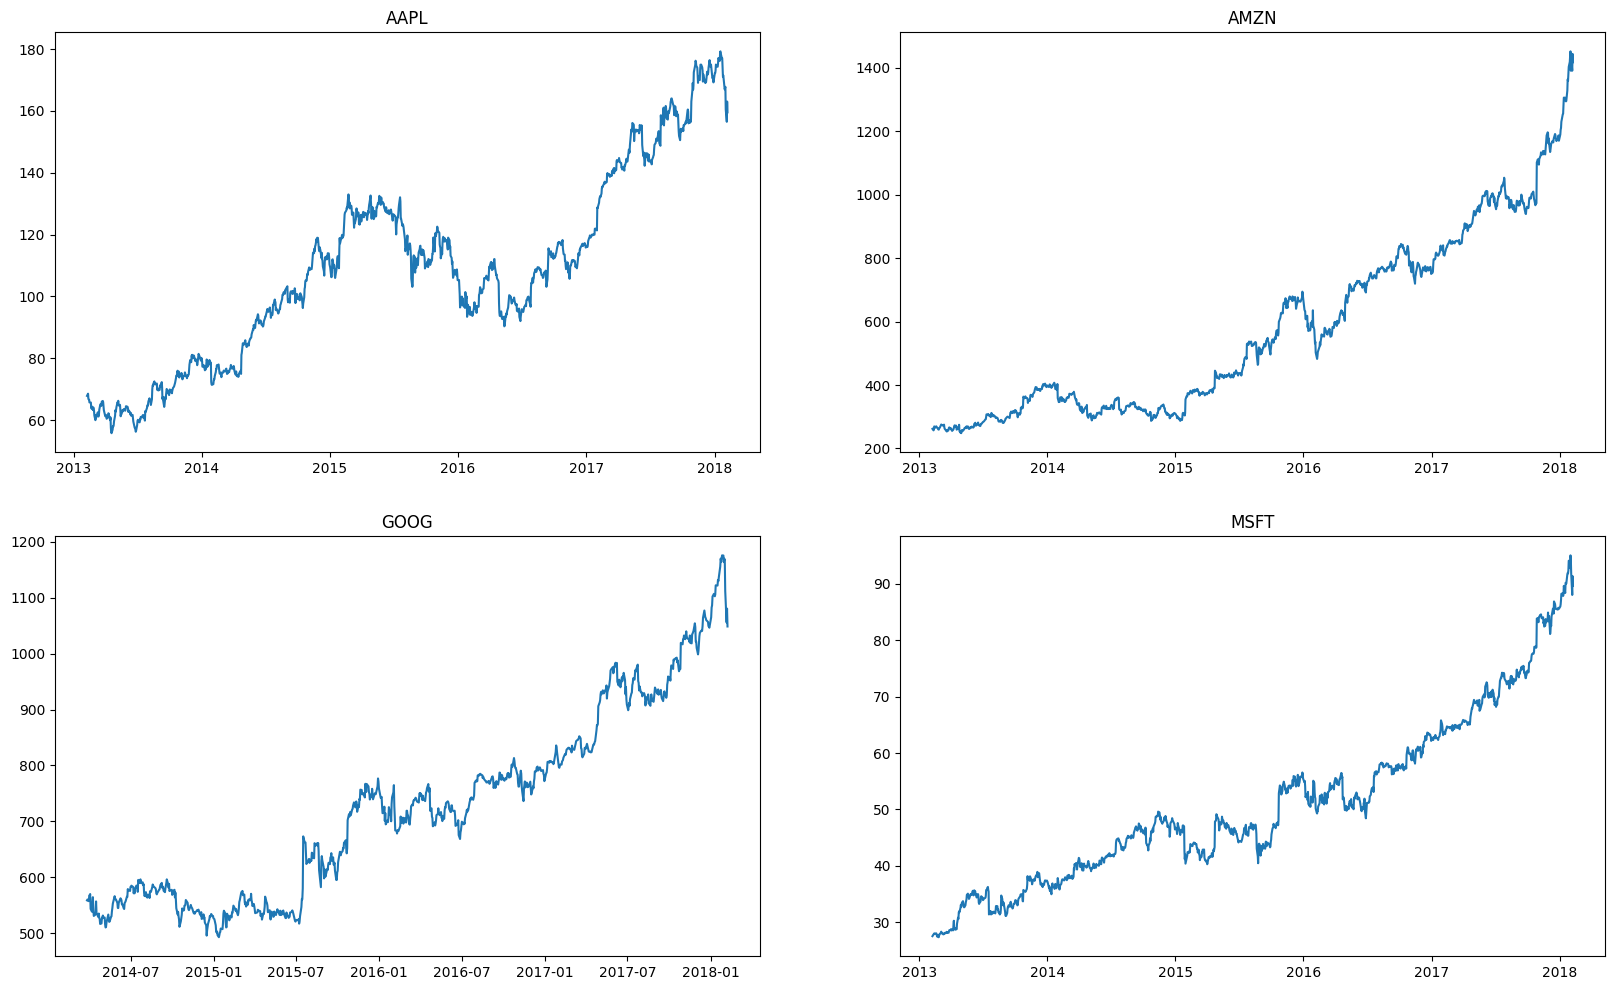

In [15]:
plt.figure(figsize=(20,12))
for i,j in enumerate(tech_lsit, 1):
    plt.subplot(2 ,2, i)
    filter1 = all_data['Name'] == j
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(j)

***What was the moving average of the various stocks?***

In [16]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [17]:
all_data['close'].rolling(window = 50).mean().head(50)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48          NaN
49    62.747386
Name: close, dtype: float64

In [18]:
new_data_df = all_data.copy()

In [19]:
new_data_df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT


In [20]:
ma_day = [50, 100, 150, 200]
for i in ma_day:
    new_data_df['close_'+ str(i)] = new_data_df['close'].rolling(window = i).mean()


In [21]:
new_data_df.tail(10)

,date,open,high,low,close,volume,Name,close_50,close_100,close_150,close_200
4742,2018-01-25,92.465,93.240,91.9300,92.33,26383238,MSFT,85.9292,81.7065,78.493867,76.08355
4743,2018-01-26,93.120,94.060,92.5800,94.06,29172167,MSFT,86.1318,81.9077,78.652533,76.22645
4744,2018-01-29,95.140,95.450,93.7200,93.92,31569940,MSFT,86.3292,82.1108,78.803933,76.36990
4745,2018-01-30,93.300,93.660,92.1000,92.74,38635053,MSFT,86.5244,82.3042,78.952000,76.50885
4746,2018-01-31,93.750,95.400,93.5100,95.01,48756338,MSFT,86.7606,82.5109,79.124000,76.65650
4747,2018-02-01,94.790,96.070,93.5813,94.26,47227882,MSFT,86.9978,82.7137,79.287067,76.80085
4748,2018-02-02,93.640,93.970,91.5000,91.78,47867753,MSFT,87.1828,82.8839,79.442333,76.93455
4749,2018-02-05,90.560,93.240,88.0000,88.00,51031465,MSFT,87.2684,83.0171,79.569467,77.04705
4750,2018-02-06,86.890,91.475,85.2500,91.33,67998564,MSFT,87.4328,83.1783,79.723867,77.17170
4751,2018-02-07,90.490,91.770,89.2000,89.61,41107592,MSFT,87.5598,83.3267,79.860733,77.28210


In [22]:
new_data_df.set_index('date', inplace = True)

In [23]:
new_data_df

,open,high,low,close,volume,Name,close_50,close_100,close_150,close_200
date,,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,86.9978,82.7137,79.287067,76.80085
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,87.1828,82.8839,79.442333,76.93455
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,87.2684,83.0171,79.569467,77.04705


In [24]:
new_data_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_50',
       'close_100', 'close_150', 'close_200'],
      dtype='object')

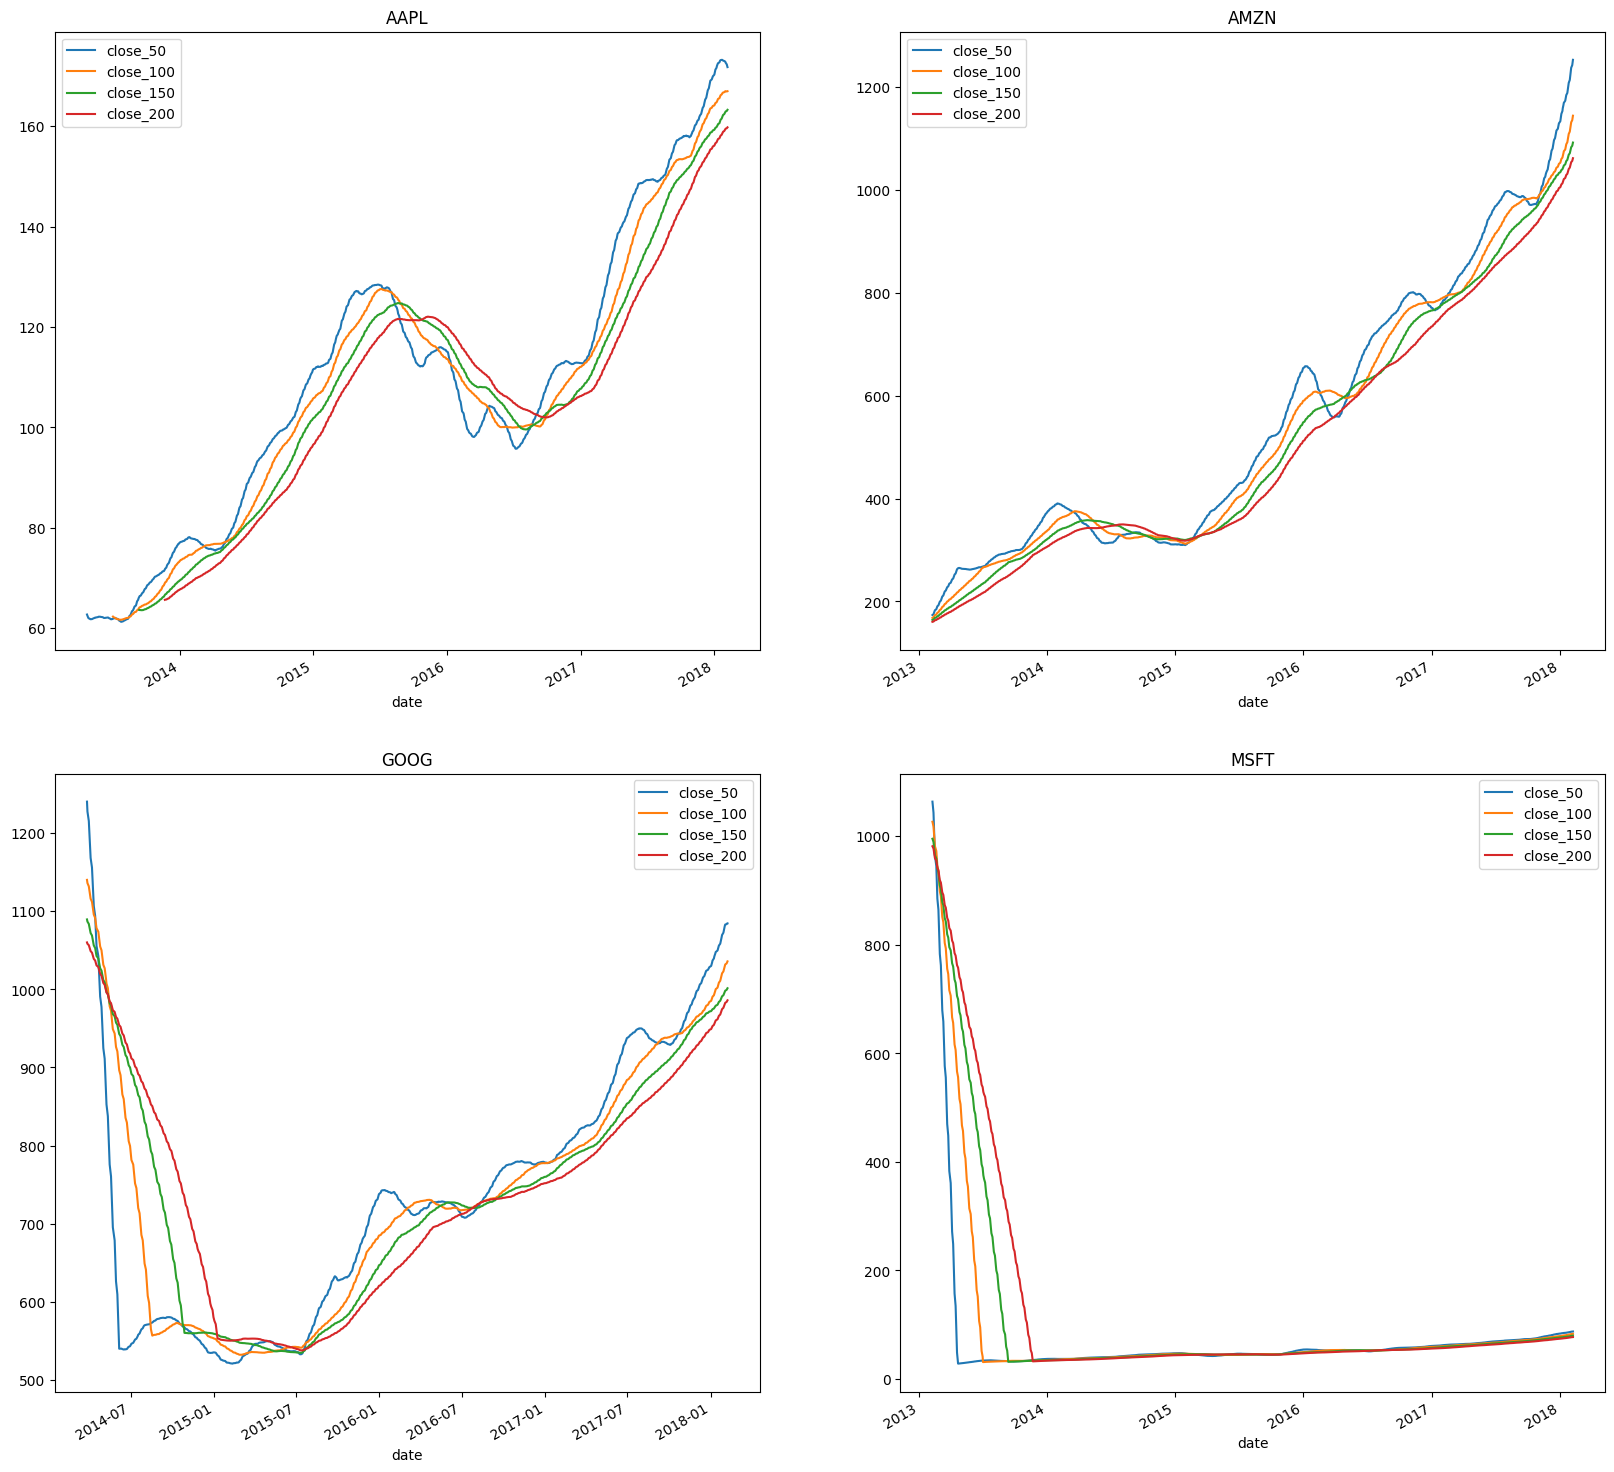

In [25]:
plt.figure(figsize=(20,20))
for i,j in enumerate(tech_lsit, 1):
    plt.subplot(2 ,2, i)
    filter1 = new_data_df['Name'] == j
    df = new_data_df[filter1]
    df[['close_50','close_100', 'close_150', 'close_200']].plot(ax = plt.gca())
    plt.title(j)

***Analyse Closing price change in apple stock***

In [26]:
company_list

['D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AAPL_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AMZN_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\GOOG_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\MSFT_data.csv']

In [27]:
apple_data = pd.read_csv(r'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AAPL_data.csv')

In [28]:
apple_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
apple_data['Daily_retuen_in(%)'] = apple_data['close'].pct_change() * 100

In [30]:
apple_data

,date,open,high,low,close,volume,Name,Daily_retuen_in(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,4.179181


In [31]:
import plotly.express as px

In [32]:
px.line(apple_data ,x ="date", y ="Daily_retuen_in(%)")

***Analyse Closing price change in google stock***

In [33]:
company_list

['D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AAPL_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AMZN_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\GOOG_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\MSFT_data.csv']

In [34]:
google_data = pd.read_csv(r'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\GOOG_data.csv')

In [35]:
google_data['Daily_retuen_in(%)'] = google_data['close'].pct_change() * 100

In [36]:
google_data

,date,open,high,low,close,volume,Name,Daily_retuen_in(%)
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,NaN
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,0.273968
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-0.539295
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,1.829542
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,-0.028211
...,...,...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG,-0.191463
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG,-4.778625
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG,-5.045418
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956,GOOG,2.348930


In [37]:
px.line(google_data ,x ="date", y ="Daily_retuen_in(%)")

***Analyse Closing price change in Amazon stock***

In [38]:
Amazon_data = pd.read_csv(r'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AMZN_data.csv')
Amazon_data['Daily_retuen_in(%)'] = Amazon_data['close'].pct_change() * 100
px.line(Amazon_data ,x ="date", y ="Daily_retuen_in(%)")

***Analyse Closing price change in Microsoft stock***

In [39]:
microsoft_data = pd.read_csv(r'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\MSFT_data.csv')
microsoft_data['Daily_retuen_in(%)'] = microsoft_data['close'].pct_change() * 100
px.line(microsoft_data ,x ="date", y ="Daily_retuen_in(%)")

***Performing resampling analysis of apple closing stock price***

In [40]:
apple_data.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_retuen_in(%)    float64
dtype: object

for resampling we need date data type to date and time format 

In [41]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [42]:
apple_data.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_retuen_in(%)           float64
dtype: object

In [43]:
apple_data.set_index('date', inplace = True)

In [44]:
apple_data

,open,high,low,close,volume,Name,Daily_retuen_in(%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442


<Axes: xlabel='date'>

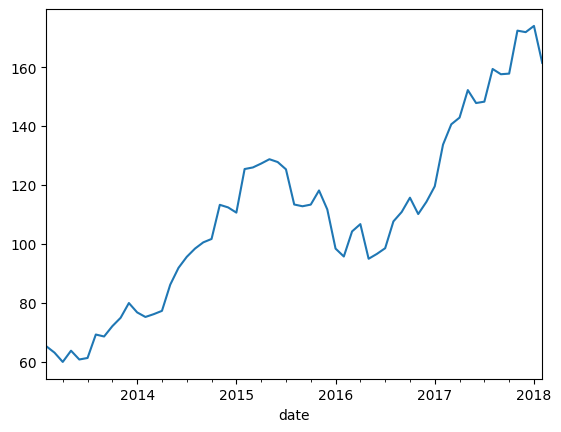

In [45]:
apple_data['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

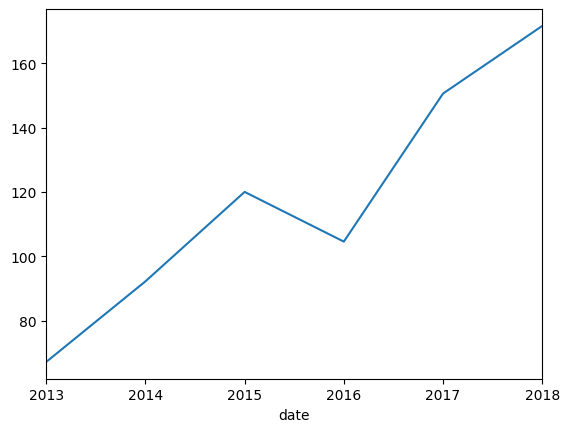

In [46]:
apple_data['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

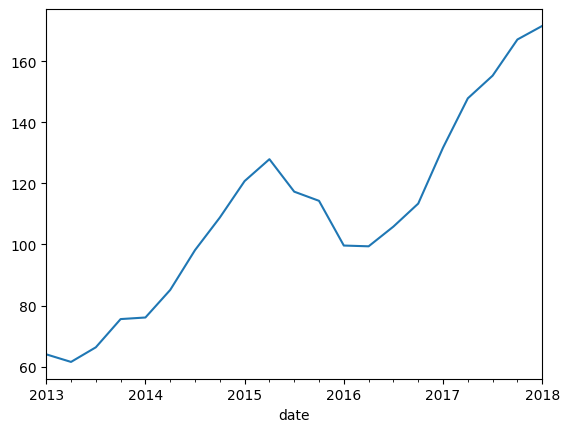

In [47]:
apple_data['close'].resample('Q').mean().plot()

***Performing resampling analysis of Google closing stock price***

<Axes: xlabel='date'>

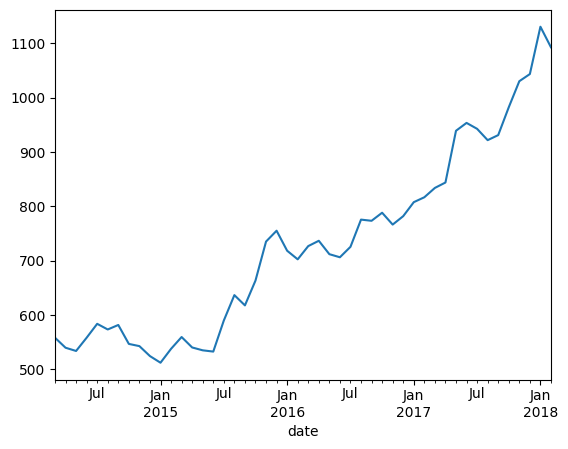

In [48]:
google_data['date'] = pd.to_datetime(google_data['date'])
google_data.set_index('date', inplace = True)
google_data['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

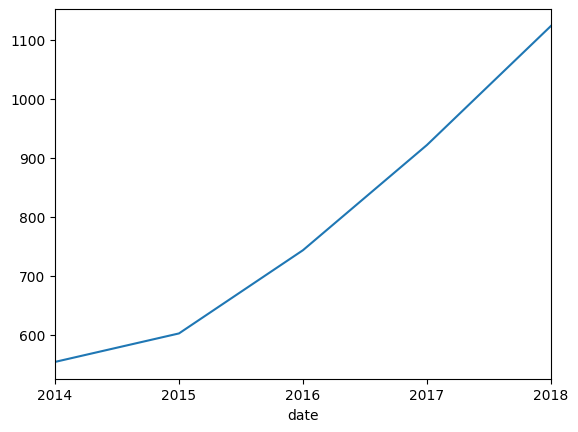

In [49]:
google_data['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

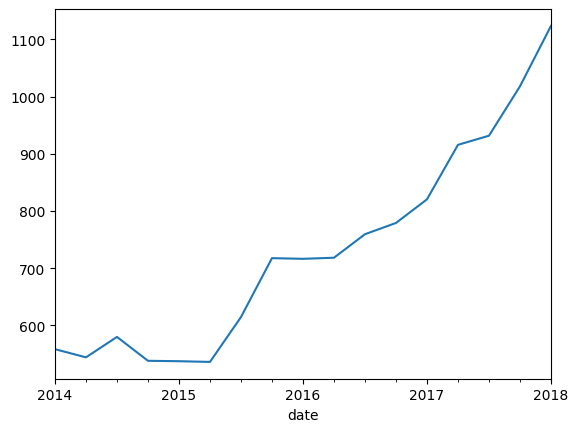

In [50]:
google_data['close'].resample('Q').mean().plot()

***Performing resampling analysis of Amazon closing stock price***

<Axes: xlabel='date'>

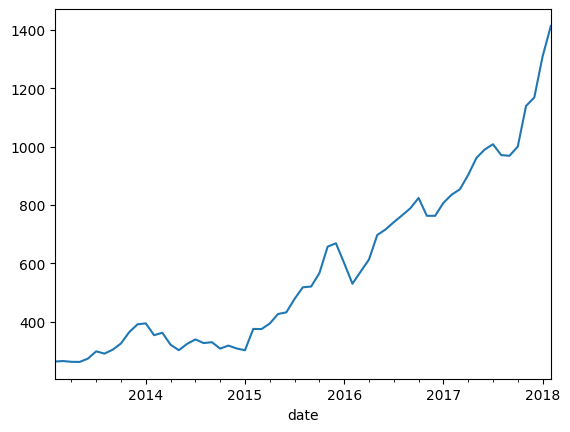

In [51]:
Amazon_data['date'] = pd.to_datetime(Amazon_data['date'])
Amazon_data.set_index('date', inplace = True)
Amazon_data['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

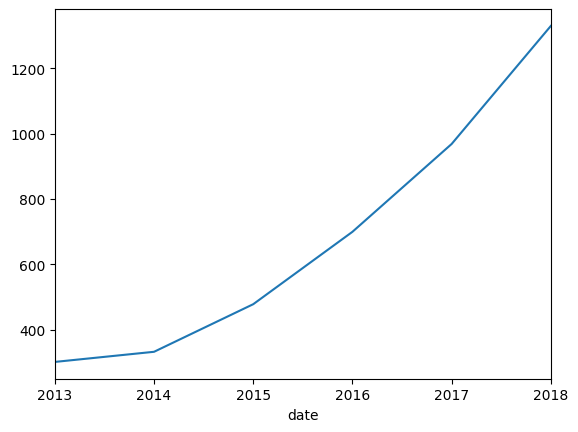

In [52]:
Amazon_data['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

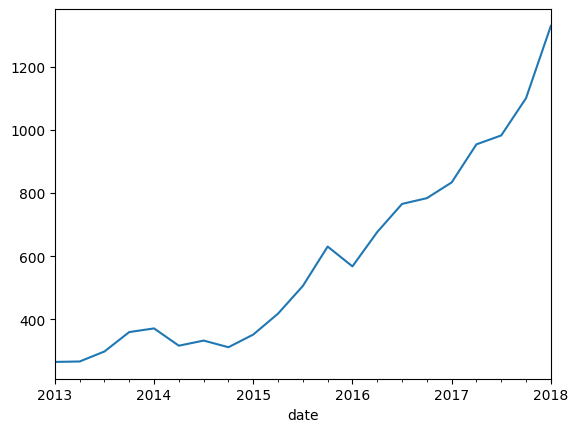

In [53]:
Amazon_data['close'].resample('Q').mean().plot()

***Performing resampling analysis of Microsoft closing stock price***

<Axes: xlabel='date'>

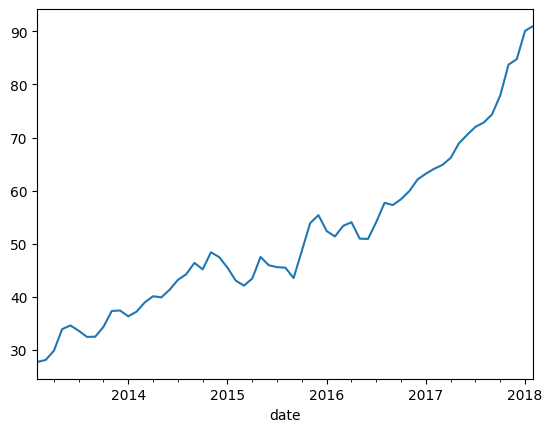

In [54]:
microsoft_data['date'] = pd.to_datetime(microsoft_data['date'])
microsoft_data.set_index('date', inplace = True)
microsoft_data['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

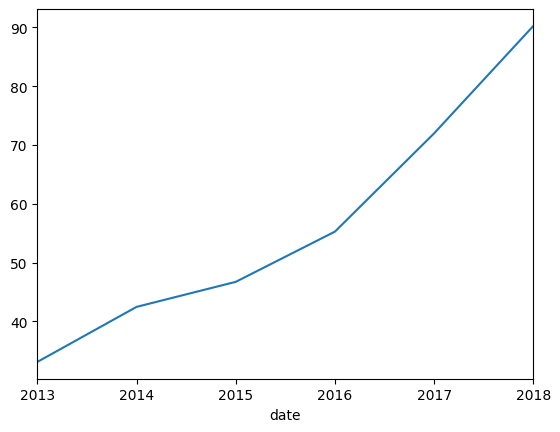

In [55]:
microsoft_data['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

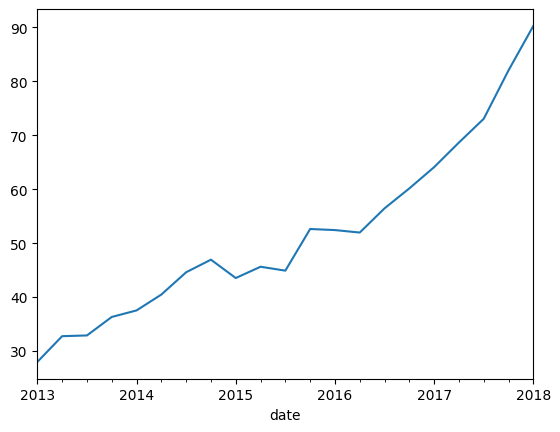

In [56]:
microsoft_data['close'].resample('Q').mean().plot()

***Checking if the closing prices of these tech companies are correlates or not***

In [57]:
company_list

['D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AAPL_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\AMZN_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\GOOG_data.csv',
 'D:\\\\python_analysis_project\\\\Time_Series_Project_Stock_Market_Case\\\\Dataset\\\\MSFT_data.csv']

In [59]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [60]:
closing_price = pd.DataFrame()

In [61]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [62]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [64]:
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

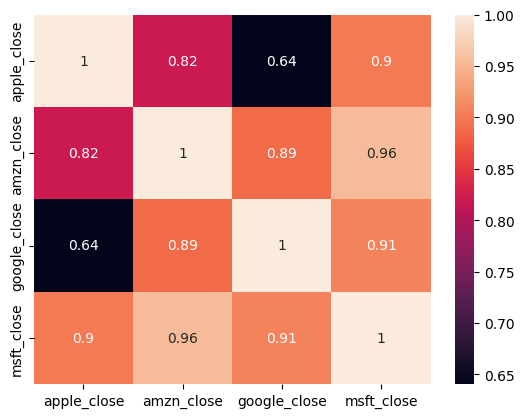

In [66]:
sns.heatmap(closing_price.corr(), annot = True)

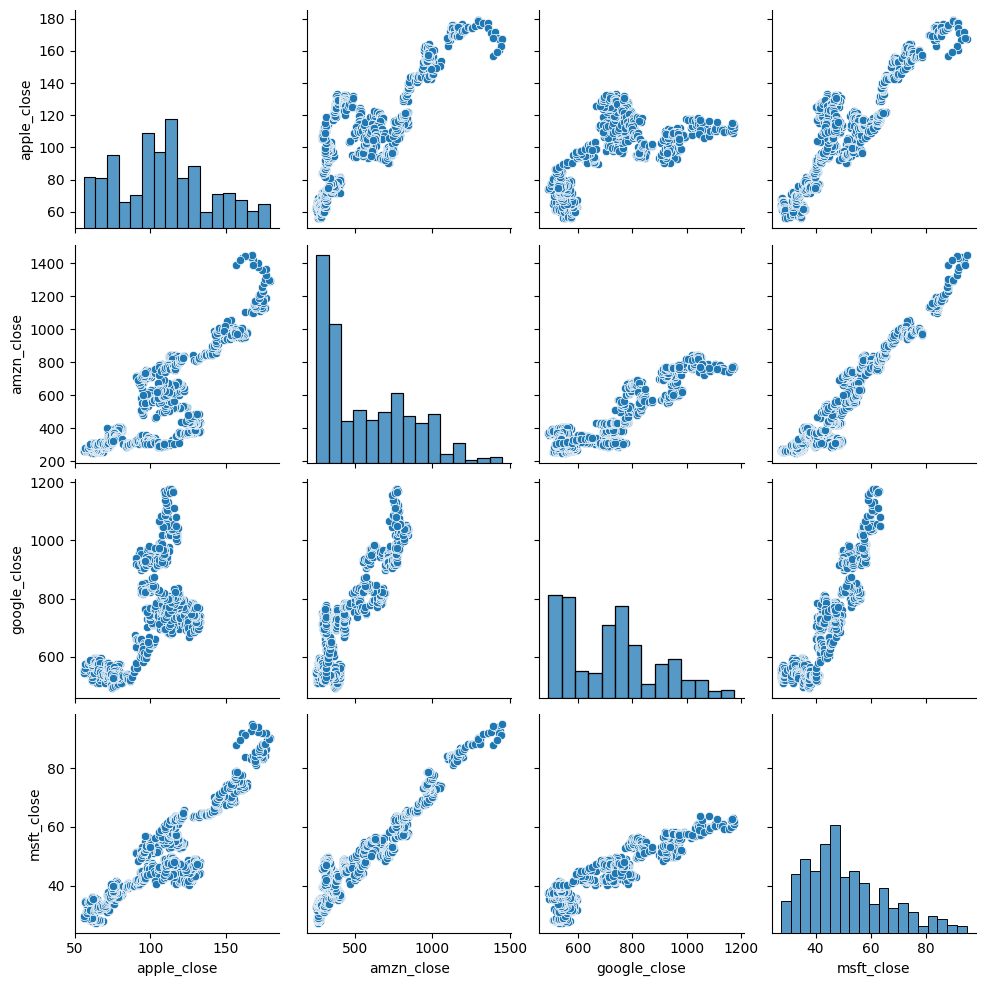

In [63]:
sns.pairplot(closing_price)

***Whether daily change in closing prices of stock or daily return in stock are co-related or not***

In [71]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [72]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [73]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [75]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1)) / closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [77]:
for col in closing_price.columns:
    closing_price[col + "_pct_change"] =(closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100

In [79]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [80]:
closing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change']]

In [81]:
closing_p

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


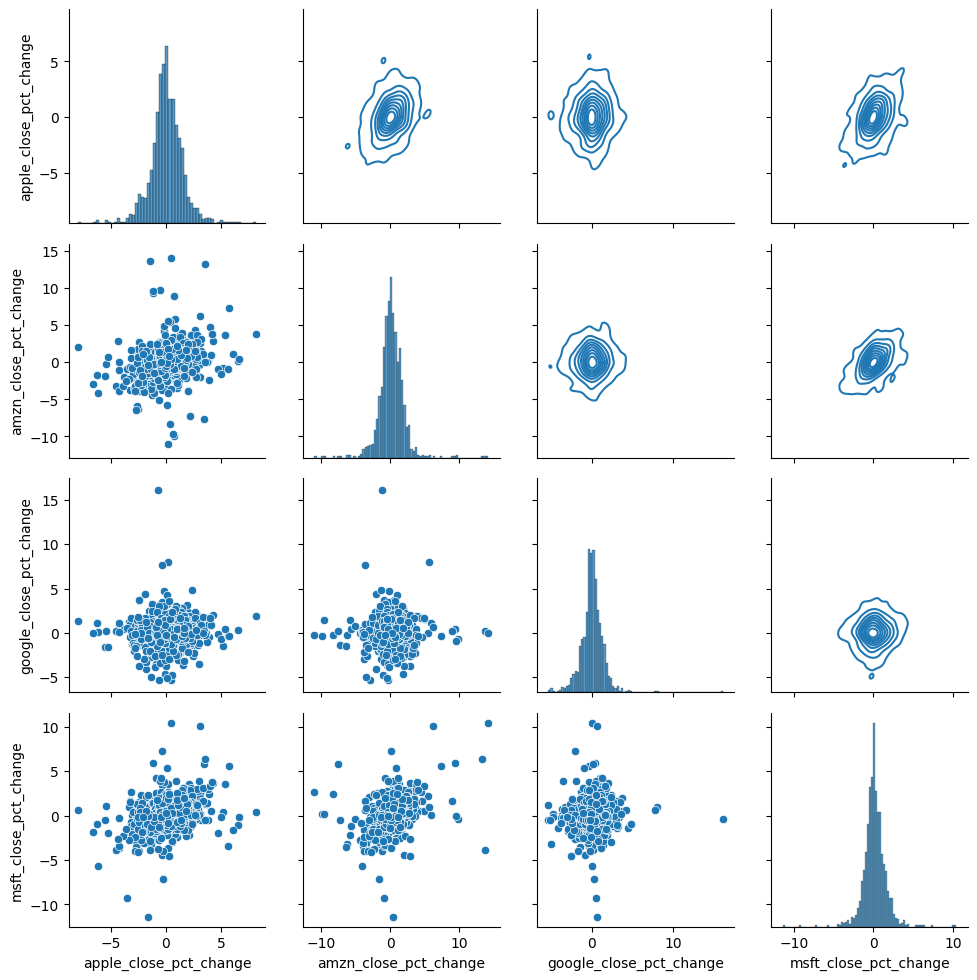

In [83]:
g = sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [84]:
closing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
google_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000
